# LGBM & XGBM

## Exploratory Data Analysis (EDA):

### 1.	Load the Titanic dataset using Python's pandas library.

In [1]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv("Titanic_train.csv")

# Display the first few rows
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Load the test dataset
test_df = pd.read_csv("Titanic_test.csv")

# Display the first few rows
print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


### 2.	Check for missing values.

In [5]:
# Check for missing values in each column
missing_values = train_df.isnull().sum()

# Display columns with at least one missing value
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


### 3.	Explore data distributions using histograms and box plots.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

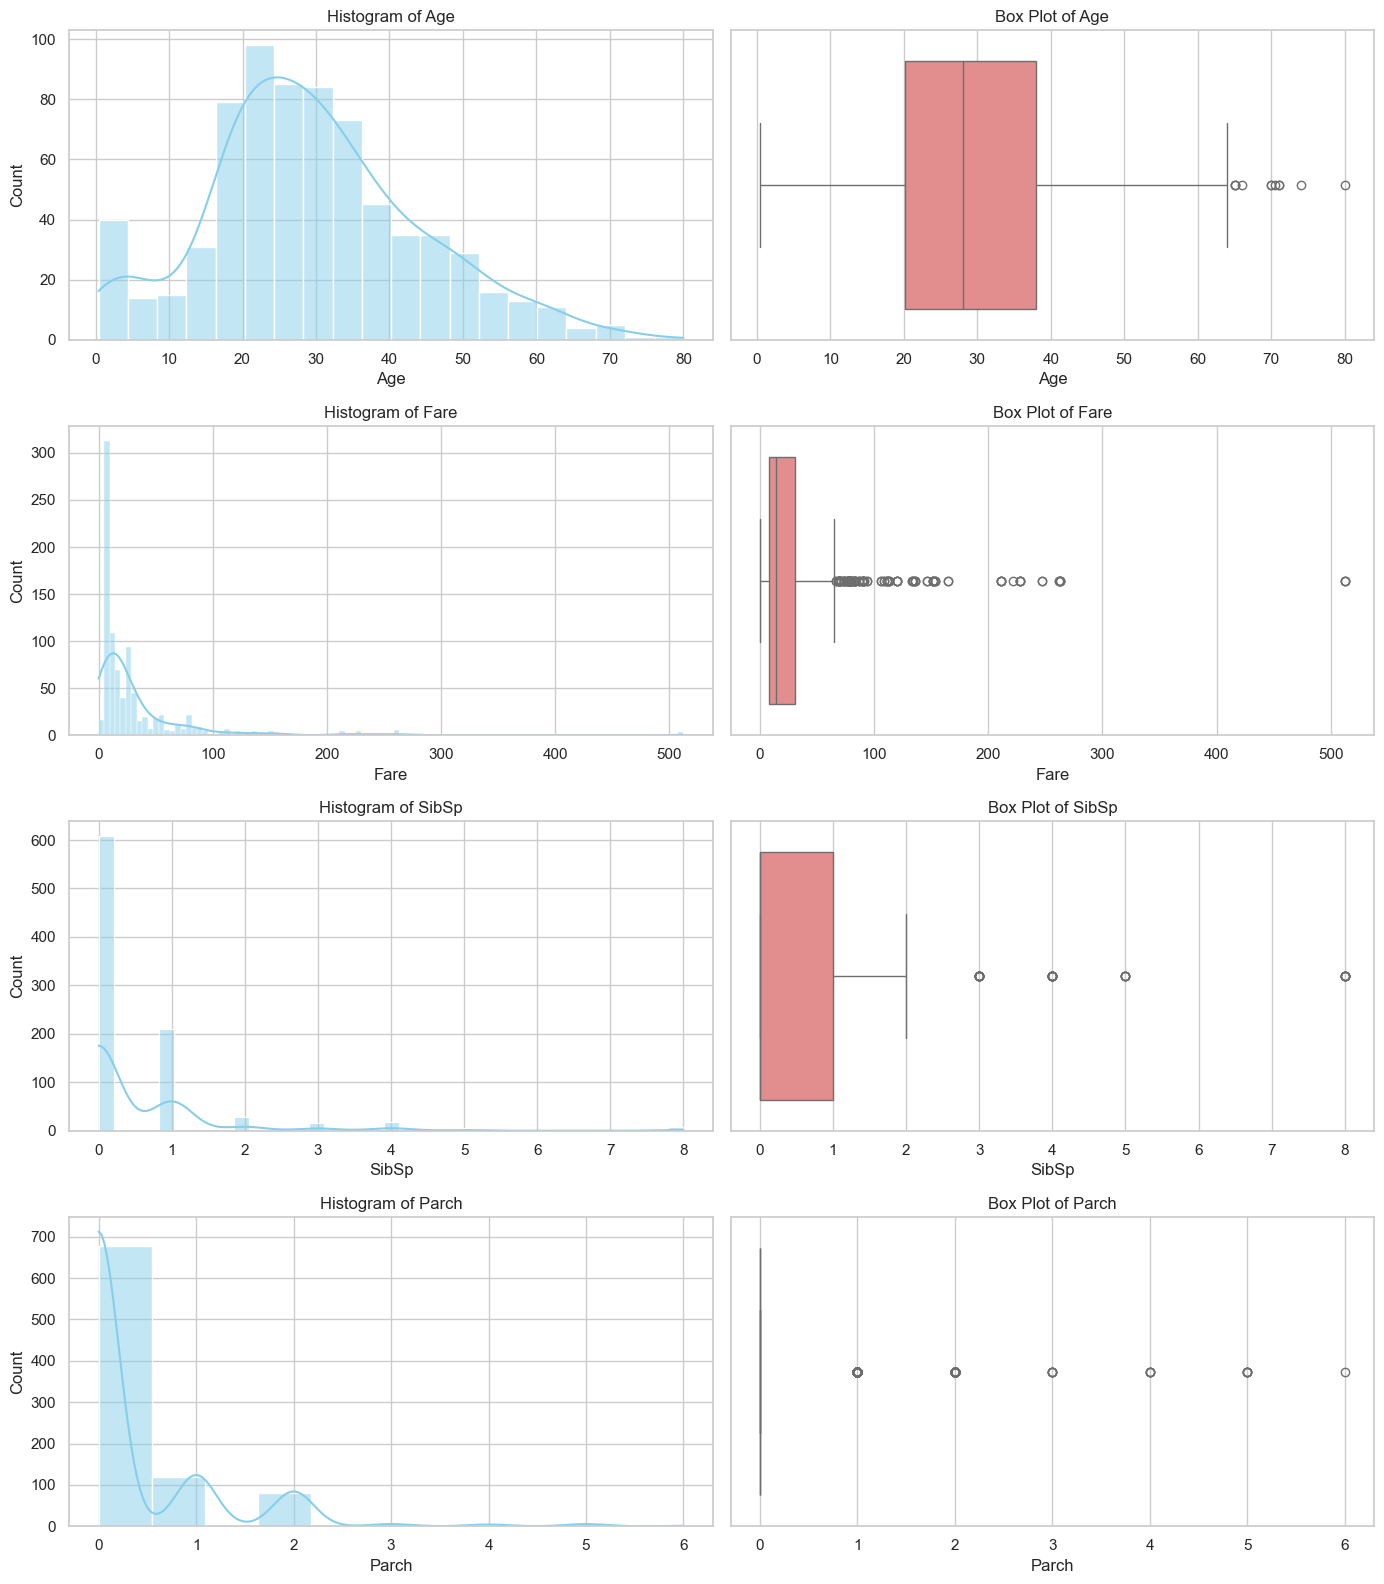

In [9]:
# List of numerical features to explore
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Set plot style
sns.set(style="whitegrid")

# Create subplots: 1 histogram and 1 box plot per feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(train_df[feature].dropna(), kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'Histogram of {feature}')
    
    # Box plot
    sns.boxplot(x=train_df[feature], ax=axes[i][1], color='lightcoral')
    axes[i][1].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


### 4.	Visualize relationships between features and survival using scatter plots and bar plots.

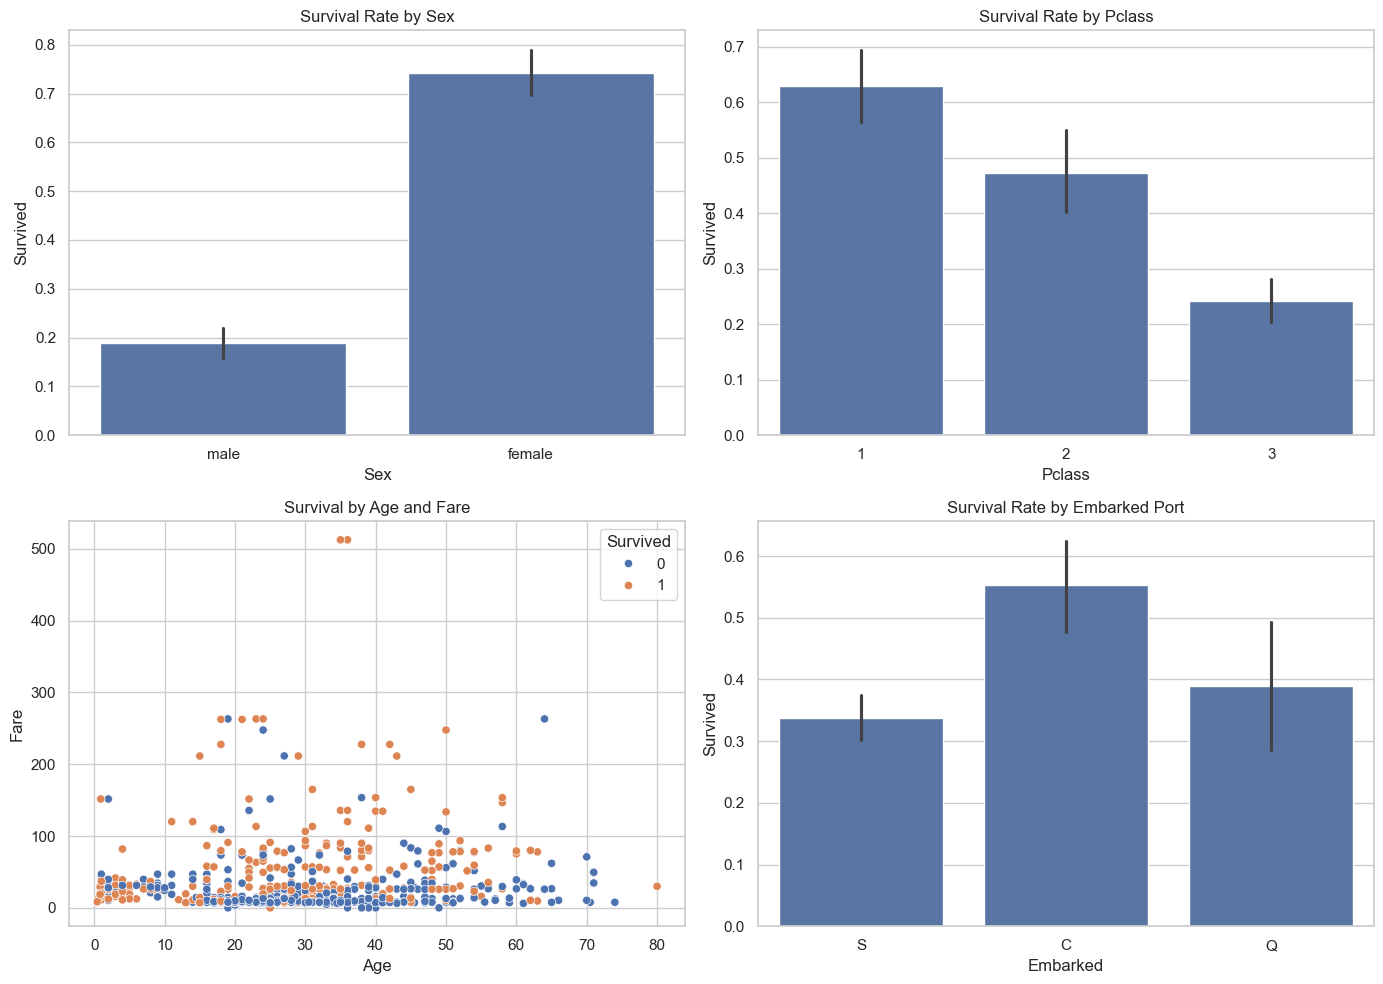

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot: Survival by Sex
sns.barplot(x='Sex', y='Survived', data=train_df, ax=axes[0][0])
axes[0][0].set_title('Survival Rate by Sex')

# Bar plot: Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[0][1])
axes[0][1].set_title('Survival Rate by Pclass')

# Scatter plot: Age vs Fare, colored by Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df, ax=axes[1][0])
axes[1][0].set_title('Survival by Age and Fare')

# Bar plot: Survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axes[1][1])
axes[1][1].set_title('Survival Rate by Embarked Port')

# Display plots
plt.tight_layout()
plt.show()

## Data Preprocessing:

### 1.	Impute missing values.

In [13]:
# Fill missing Age values with the median
train_df['Age']=train_df['Age'].fillna(train_df['Age'].median())

# Fill missing Embarked values with the mode (most frequent value)
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Drop the 'Cabin' column because it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)

# Optional: Confirm that no missing values remain
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 2.	Encode categorical variables using one-hot encoding or label encoding. 

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create encoders
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Apply label encoding
train_df['Sex'] = le_sex.fit_transform(train_df['Sex'])          # male=1, female=0
train_df['Embarked'] = le_embarked.fit_transform(train_df['Embarked'])  # S=2, C=0, Q=1

# Preview
print(train_df[['Sex', 'Embarked']].head())

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


### 3.	If needed you can apply more preprocessing methods on the given dataset.

In [17]:
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [19]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [21]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Adult', 'Mid-age', 'Senior'])

# Encode AgeGroup
from sklearn.preprocessing import LabelEncoder
age_le = LabelEncoder()
train_df['AgeGroup'] = age_le.fit_transform(train_df['AgeGroup'].astype(str))  # Handle NaNs if any



In [23]:
print(train_df.head())
print(train_df.info())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         0       3    1  22.0      1      0   7.2500         2           2   
1         1       1    0  38.0      1      0  71.2833         0           2   
2         1       3    0  26.0      0      0   7.9250         2           1   
3         1       1    0  35.0      1      0  53.1000         2           2   
4         0       3    1  35.0      0      0   8.0500         2           1   

   AgeGroup  
0         0  
1         2  
2         0  
3         0  
4         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Far

## Building Predictive Models:

### 1.	Split the preprocessed dataset into training and testing sets.

In [25]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = train_df.drop('Survived', axis=1)  # Features
y = train_df['Survived']               # Target

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 9)
X_test shape: (179, 9)
y_train shape: (712,)
y_test shape: (179,)


### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
Choosing the right evaluation metrics depends on the nature of your problem. Since the Titanic dataset is a binary classification task (Survived = 0 or 1), here are the most suitable metrics:

1. Accuracy
Definition: Ratio of correctly predicted observations to total observations.
Good when: Classes are balanced (roughly equal 0s and 1s).

2. Precision
Definition: Out of predicted survivors, how many are actually survivors.
Good when: False positives are costly.
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


3. Recall
Definition: Out of actual survivors, how many we correctly predicted.
Good when: False negatives are costly (e.g., missing actual survivors).


4. F1-Score
Definition: Harmonic mean of precision and recall.
Good when: Balance between precision and recall is needed.
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


5. Classification Report (summary of all)
Includes all 4 metrics for each class.
| Metric        | Use                                    |
|---------------|----------------------------------------|
| Accuracy      | Classes are balanced                   |
| Precision     | You want fewer false positives         |
| Recall        | You want fewer false negatives         |
| F1-Score      | You want a balance between P and R     |


### 3.	Build predictive models using LightGBM and XGBoost algorithms.

In [27]:
#!pip install lightgbm xgboost

In [29]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Rebuild models with additional tuning
lgbm_model = LGBMClassifier(
    random_state=42,
    min_gain_to_split=0.0,   # Allow any gain
    verbose=-1               # Suppress verbose output
)

In [31]:
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

# Train models
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
# Predict on the test set
lgbm_preds = lgbm_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

### 4.	Train the models on the training set and evaluate their performance on the testing set.

In [35]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize models
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train models
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict
lgbm_preds = lgbm_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n {model_name} Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model(y_test, lgbm_preds, "LightGBM")
evaluate_model(y_test, xgb_preds, "XGBoost")


 LightGBM Evaluation Metrics:
Accuracy: 0.7932960893854749
Precision: 0.7424242424242424
Recall: 0.7101449275362319
F1-score: 0.725925925925926

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


 XGBoost Evaluation Metrics:
Accuracy: 0.7988826815642458
Precision: 0.7391304347826086
Recall: 0.7391304347826086
F1-score: 0.7391304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Scoring metric
f1 = make_scorer(f1_score)

In [39]:
# LightGBM Hyperparameter Tuning 
lgbm_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

lgbm_grid = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=lgbm_params,
    scoring=f1,
    cv=5,
    n_jobs=-1,
    verbose=1
)

lgbm_grid.fit(X_train, y_train)
best_lgbm = lgbm_grid.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [41]:
# XGBoost Hyperparameter Tuning 
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    scoring=f1,
    cv=5,
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [43]:
# Evaluate Tuned Models
from sklearn.metrics import classification_report

lgbm_preds = best_lgbm.predict(X_test)
xgb_preds = best_xgb.predict(X_test)

print("\n Tuned LightGBM:")
print(classification_report(y_test, lgbm_preds))

print("\n Tuned XGBoost:")
print(classification_report(y_test, xgb_preds))


 Tuned LightGBM:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       110
           1       0.85      0.58      0.69        69

    accuracy                           0.80       179
   macro avg       0.82      0.76      0.77       179
weighted avg       0.81      0.80      0.79       179


 Tuned XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



## Comparative Analysis:

### 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions (already made using best_lgbm and best_xgb)
lgbm_preds = best_lgbm.predict(X_test)
xgb_preds = best_xgb.predict(X_test)

In [47]:
# Calculate metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgbm_scores = [
    accuracy_score(y_test, lgbm_preds),
    precision_score(y_test, lgbm_preds),
    recall_score(y_test, lgbm_preds),
    f1_score(y_test, lgbm_preds)
]

In [49]:
xgb_scores = [
    accuracy_score(y_test, xgb_preds),
    precision_score(y_test, xgb_preds),
    recall_score(y_test, xgb_preds),
    f1_score(y_test, xgb_preds)
]

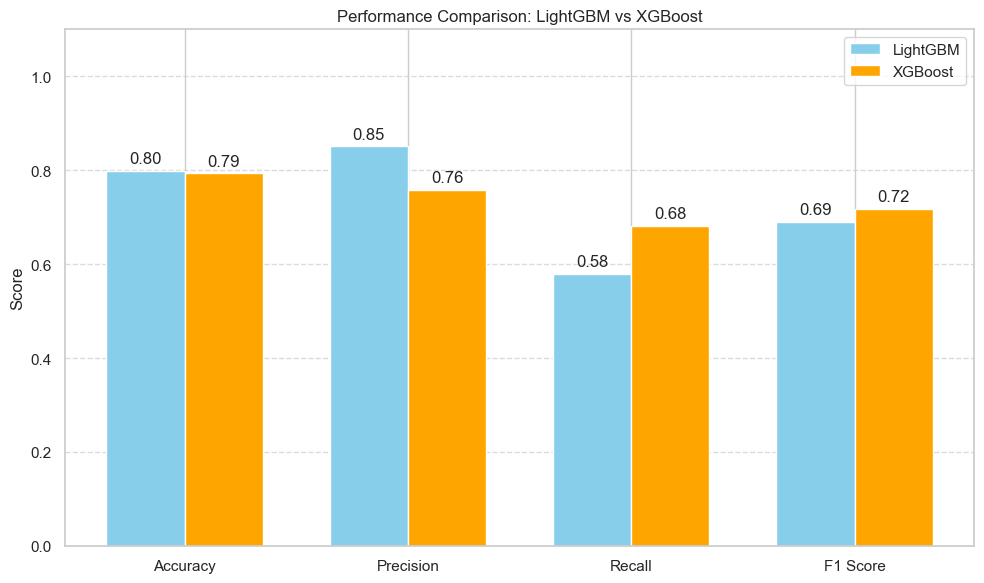

In [51]:
# Bar chart setup
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, lgbm_scores, width, label='LightGBM', color='skyblue')
bars2 = plt.bar(x + width/2, xgb_scores, width, label='XGBoost', color='orange')

# Add value labels above bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Labels and title
plt.ylabel('Score')
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Make predictions
lgbm_preds = best_lgbm.predict(X_test)
xgb_preds = best_xgb.predict(X_test)

In [55]:
# Define metric names and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgbm_scores = [
    accuracy_score(y_test, lgbm_preds),
    precision_score(y_test, lgbm_preds),
    recall_score(y_test, lgbm_preds),
    f1_score(y_test, lgbm_preds)
]
xgb_scores = [
    accuracy_score(y_test, xgb_preds),
    precision_score(y_test, xgb_preds),
    recall_score(y_test, xgb_preds),
    f1_score(y_test, xgb_preds)
]

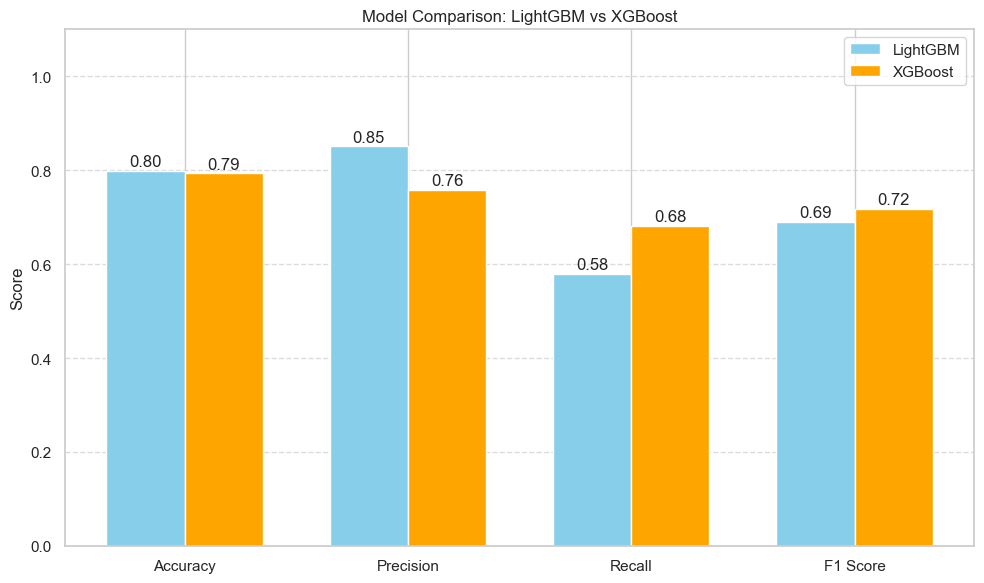

In [57]:
# Bar plot for metric comparison
x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], lgbm_scores, width=width, label="LightGBM", color='skyblue')
plt.bar([i + width/2 for i in x], xgb_scores, width=width, label="XGBoost", color='orange')

# Add value labels
for i in x:
    plt.text(i - width/2, lgbm_scores[i] + 0.01, f"{lgbm_scores[i]:.2f}", ha='center')
    plt.text(i + width/2, xgb_scores[i] + 0.01, f"{xgb_scores[i]:.2f}", ha='center')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Comparison: LightGBM vs XGBoost")
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

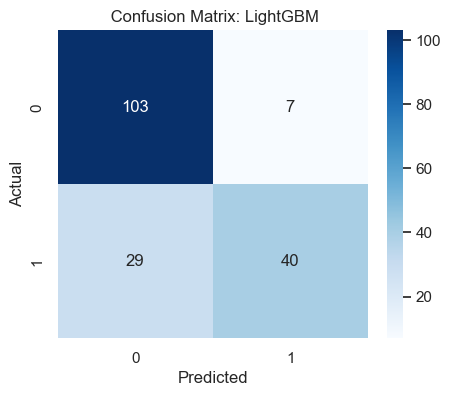

In [59]:
#  Confusion Matrix: LightGBM
cm_lgbm = confusion_matrix(y_test, lgbm_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues')
plt.title(" Confusion Matrix: LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

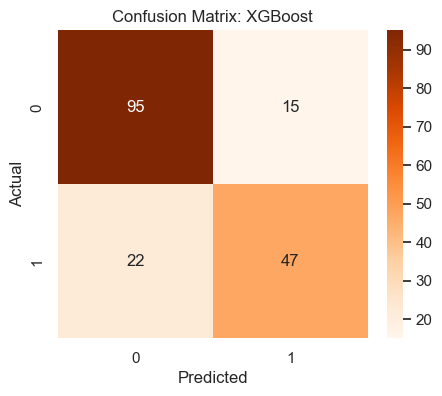

In [61]:
# Confusion Matrix: XGBoost
cm_xgb = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()